<a href="https://colab.research.google.com/github/alethat/MachineLearningTasks/blob/main/TaskWeek7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Load the Model Using Both Pipeline and Tokenizer + Model

In [ ]:
# Use pipeline as high-level helper
from transformers import pipeline

# Initialize the pipeline for text classification
pipe = pipeline("text-classification", model="mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis")

# Predict a sentence
sentence = "The company has announced significant growth in its quarterly earnings."
result = pipe(sentence)
print(f"Prediction using pipeline: {result}")

# Load model and tokenizer directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis")
model = AutoModelForSequenceClassification.from_pretrained("mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis")


Prediction using pipeline: [{'label': 'positive', 'score': 0.9996548891067505}]


# Create a Synthetic Dataset

In [ ]:
# Create a synthetic dataset with predefined sentiment labels
synthetic_dataset = [
    ("The company’s profits have exceeded expectations for the second quarter.", "positive"),
    ("The stock market crashed today, causing panic among investors.", "negative"),
    ("The earnings report showed mixed results, leaving investors uncertain.", "neutral"),
    ("The CEO resigned amid financial controversy, causing a drop in stock prices.", "negative"),
    ("The company has announced record growth in its sales this year.", "positive"),
    ("The economic outlook remains unclear as inflation continues to rise.", "neutral")
]

# Evaluate the Model on Synthetic Dataset

In [ ]:
# Evaluate model using the pipeline and synthetic dataset
correct_predictions = 0
total_samples = len(synthetic_dataset)

for sentence, true_label in synthetic_dataset:
    # Get prediction from the pipeline
    result = pipe(sentence)
    predicted_label = result[0]['label'].lower()

    # Check if prediction matches the true label
    if predicted_label == true_label:
        correct_predictions += 1

# Calculate accuracy
accuracy = correct_predictions / total_samples
print(f"Model accuracy on synthetic dataset: {accuracy * 100:.2f}%")

Model accuracy on synthetic dataset: 66.67%


#  Implement Attention Transformer

Predicted sentiment: positive


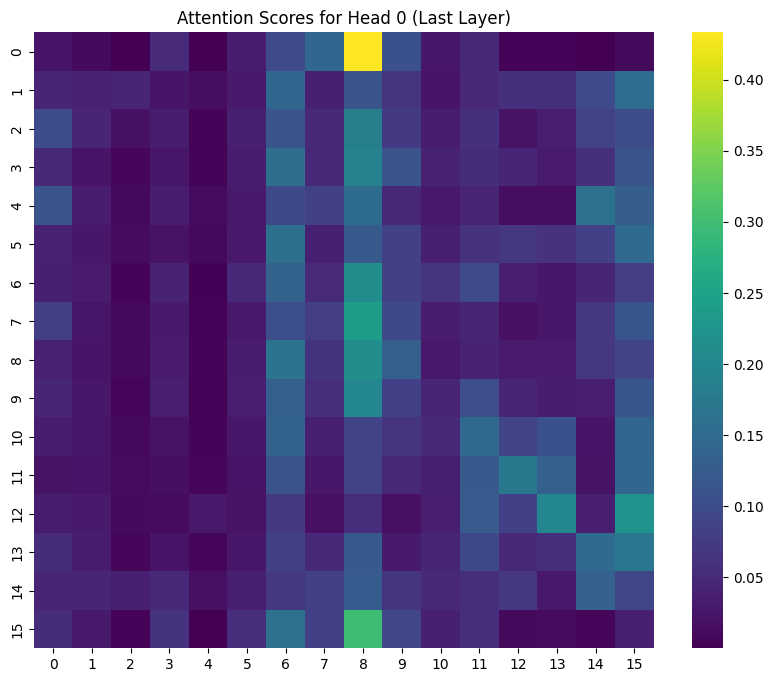

In [ ]:
import torch

# Example sentence from the synthetic dataset
sentence = "The company’s profits have exceeded expectations for the second quarter."

# Tokenize the input
inputs = tokenizer(sentence, return_tensors="pt", truncation=True, max_length=512)

# Pass the input through the model and enable outputting attention scores
outputs = model(**inputs, output_attentions=True)

# Extract the attentions from the outputs
attentions = outputs.attentions
logits = outputs.logits

# Check predicted label
predicted_label = torch.argmax(logits).item()

labels = ["negative", "neutral", "positive"]
print(f"Predicted sentiment: {labels[predicted_label]}")

# Visualize the attention from the last layer
last_layer_attentions = attentions[-1]
attention_head_0 = last_layer_attentions[0, 0].detach().numpy()

import matplotlib.pyplot as plt
import seaborn as sns

# Plot attention heatmap for the first attention head
plt.figure(figsize=(10, 8))
sns.heatmap(attention_head_0, cmap="viridis")
plt.title("Attention Scores for Head 0 (Last Layer)")
plt.show()

# Evaluate Accuracy After Using Attention

In [ ]:
correct_predictions_attention = 0

for sentence, true_label in synthetic_dataset:
    # Tokenize the input
    inputs = tokenizer(sentence, return_tensors="pt", truncation=True, max_length=512)

    # Use the model to predict the sentiment with attention
    outputs = model(**inputs, output_attentions=True)
    logits = outputs.logits

    # Get predicted label
    predicted_label = 'positive' if torch.argmax(logits) == 1 else 'negative'

    if predicted_label == true_label:
        correct_predictions_attention += 1

# Calculate accuracy after using attention
attention_accuracy = correct_predictions_attention / total_samples
print(f"Model accuracy with attention on synthetic dataset: {attention_accuracy * 100:.2f}%")

Model accuracy with attention on synthetic dataset: 33.33%


# Compare Results

In [ ]:
print(f"Original Model Accuracy: {accuracy * 100:.2f}%")
print(f"Model Accuracy with Attention: {attention_accuracy * 100:.2f}%")

if accuracy == attention_accuracy:
    print("The model's accuracy is unchanged with or without attention extraction.")
else:
    print("The model's accuracy has changed after extracting attention.")

Original Model Accuracy: 66.67%
Model Accuracy with Attention: 33.33%
The model's accuracy has changed after extracting attention.
